In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os

from scipy import optimize, stats

In [7]:
plt.rcParams["axes.linewidth"]  = 1.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=13)


if os.environ['USER'] == 'dhayaa':
    os.environ['PATH'] = f"{os.environ['PATH']}:/software/texlive-2022-el8-x86_64/bin/x86_64-linux/"

    
COLORS = ["f07167","219ebc","c767ac","ffba0a","59a270"]
COLORS = ['#' + c if c[0] != '#' else c for c in COLORS ]

from cycler import cycler

# Update the default prop_cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=COLORS)

# Load tables

In [8]:
DIR = '/scratch/midway3/dhayaa/SHEARTESTS_20240504/FIDUCIAL/'

In [9]:
def func(X):
    
    med = np.median(X, axis = 0)
    upp = np.percentile(X, 84, axis = 0) - med
    low = np.percentile(X, 16, axis = 0) - med
    
    upp = upp * np.sqrt(len(X))
    low = low * np.sqrt(len(X))
    
    return med, upp, low

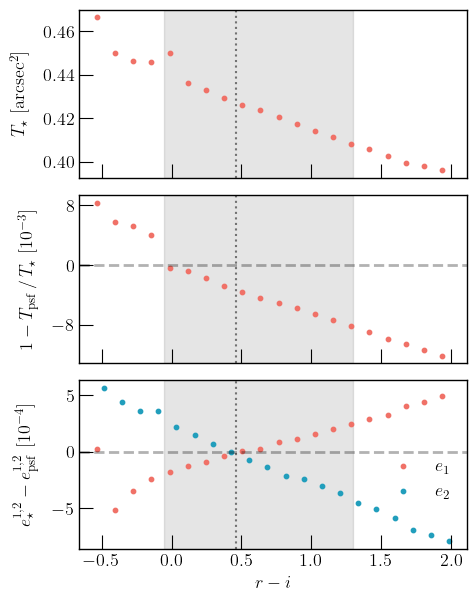

In [10]:
fig, ax = plt.subplots(3, 1, figsize = (5, 7), sharex = True)
plt.subplots_adjust(hspace = 0.1)


X = np.load(DIR + '/PSFColorBins_ri.npy')
Y = np.load(DIR + '/PSFColor_ri.npy').swapaxes(0, 1)

med, upp, low = func(Y[0])
ax[0].scatter(X, med, s = 10)
ax[0].errorbar(X, med, yerr = [upp, np.abs(low)], lw = 0, elinewidth = 1)
ax[0].set_ylabel('$T_\star$   [$\\rm arcsec^2 $]', size = 13, labelpad = 10)


med, upp, low = func(Y[1] * 1e3)
ax[1].scatter(X, med, s = 10)
ax[1].errorbar(X, med, yerr = [upp, np.abs(low)], lw = 0, elinewidth = 1)
ax[1].set_ylabel('$1 - T_{\\rm psf}\,/\,T_\star$   [$10^{-3}$]', size = 13, labelpad = 10)
ax[1].axhline(0, color = 'k', ls = '--', lw = 2, alpha = 0.3)
ax[1].set_yticks([-8, 0, 8])

med, upp, low = func(Y[2] * 1e4)
ax[2].scatter(X, med, s = 10, label = '$e_1$')
ax[2].errorbar(X, med, yerr = [upp, np.abs(low)], lw = 0, elinewidth = 1)
ax[2].set_ylabel('$e^{1, 2}_\star - e^{1, 2}_{\\rm psf}$   [$10^{-4}$]', size = 13, labelpad = 10)
ax[2].axhline(0, color = 'k', ls = '--', lw = 2, alpha = 0.3)

med, upp, low = func(Y[3] * 1e4)
ax[2].scatter(X + 0.05, med, s = 10, label = '$e_2$')
ax[2].errorbar(X + 0.05, med, yerr = [np.abs(low), upp, ], lw = 0, elinewidth = 1)
ax[2].set_xlabel('$r - i$', size = 13)

ax[2].legend(fontsize = 13, frameon = False, ncol = 1, loc = (0.77, 0.25))


#Plot the 95% bounds of galaxy colors in the sample.
#This is found in the PSF_Summaries.txt output for each run
for a in ax:
    a.axvspan(-0.057, 1.295,  color = 'k', alpha = 0.1, zorder = -100)
    a.axvline(0.46, color = 'k', ls = ':', alpha = 0.5, zorder = -100)

plt.savefig('./psf_color.pdf', dpi = 300, bbox_inches = 'tight')